### Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
plt.style.use('dark_background')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/shark-tank-indian-companies/ShartankIndiaAllPitches.csv


### Reading the dataset

In [2]:
df = pd.read_csv('/kaggle/input/shark-tank-indian-companies/ShartankIndiaAllPitches.csv')

In [3]:
df

,Episode Number,Brand,Investment Amount (In Lakhs INR),Debt (In lakhs INR),Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season
0,1,BluePine Industries,75,0,18%,N,Y,N,Y,N,Y,N,1
1,1,Booz scooters,40,0,50%,N,Y,N,N,N,Y,N,1
2,1,Heart up my Sleeves,25,0,30%,Y,N,N,N,N,Y,N,1
3,2,Tagz Foods,70,0,3%,N,Y,N,N,N,N,N,1
4,2,Head and Heart,0,0,0%,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,34,Green Protein,0,0,0%,N,N,N,N,N,N,N,1
113,34,On2Cook,0,0,0%,N,N,N,N,N,N,N,1
114,35,Jain Shikanji,40,0,30%,Y,Y,N,Y,N,Y,N,1
115,35,Woloo,0,0,0%,N,N,N,N,N,N,N,1


In [4]:
df.shape

(117, 13)

In [5]:
df.columns

Index(['Episode Number', 'Brand', 'Investment Amount (In Lakhs INR)',
       'Debt (In lakhs INR)', 'Equity', 'Anupam', 'Ashneer', 'Namita', 'Aman',
       'Peyush', 'Vineeta', 'Ghazal', 'Season'],
      dtype='object')

In [6]:
df.head()

,Episode Number,Brand,Investment Amount (In Lakhs INR),Debt (In lakhs INR),Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season
0,1,BluePine Industries,75,0,18%,N,Y,N,Y,N,Y,N,1
1,1,Booz scooters,40,0,50%,N,Y,N,N,N,Y,N,1
2,1,Heart up my Sleeves,25,0,30%,Y,N,N,N,N,Y,N,1
3,2,Tagz Foods,70,0,3%,N,Y,N,N,N,N,N,1
4,2,Head and Heart,0,0,0%,N,N,N,N,N,N,N,1


In [7]:
df.tail()

,Episode Number,Brand,Investment Amount (In Lakhs INR),Debt (In lakhs INR),Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season
112,34,Green Protein,0,0,0%,N,N,N,N,N,N,N,1
113,34,On2Cook,0,0,0%,N,N,N,N,N,N,N,1
114,35,Jain Shikanji,40,0,30%,Y,Y,N,Y,N,Y,N,1
115,35,Woloo,0,0,0%,N,N,N,N,N,N,N,1
116,35,Elcare India,0,0,0%,N,N,N,N,N,N,N,1


In [8]:
df.sample(5)

,Episode Number,Brand,Investment Amount (In Lakhs INR),Debt (In lakhs INR),Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season
49,17,Find Your Kicks India,50,0,25%,Y,Y,Y,Y,Y,N,N,1
93,29,PlayBox TV,0,0,0%,N,N,N,N,N,N,N,1
58,19,WeSTOCK,60,0,10%,N,Y,Y,Y,Y,N,N,1
115,35,Woloo,0,0,0%,N,N,N,N,N,N,N,1
12,5,Revamp Moto,10,0,2%,Y,N,N,Y,N,N,N,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Episode Number                    117 non-null    int64 
 1   Brand                             117 non-null    object
 2   Investment Amount (In Lakhs INR)  117 non-null    int64 
 3   Debt (In lakhs INR)               117 non-null    int64 
 4   Equity                            117 non-null    object
 5   Anupam                            117 non-null    object
 6   Ashneer                           117 non-null    object
 7   Namita                            117 non-null    object
 8   Aman                              117 non-null    object
 9   Peyush                            117 non-null    object
 10  Vineeta                           117 non-null    object
 11  Ghazal                            117 non-null    object
 12  Season                

In [10]:
df.describe()

,Episode Number,Investment Amount (In Lakhs INR),Debt (In lakhs INR),Season
count,117.000000,117.000000,117.000000,117.0
mean,18.735043,21.683761,2.572650,1.0
std,10.070778,26.067766,11.544753,0.0
min,1.000000,0.000000,0.000000,1.0
25%,10.000000,0.000000,0.000000,1.0
50%,19.000000,10.000000,0.000000,1.0
75%,27.000000,50.000000,0.000000,1.0
max,35.000000,80.000000,99.000000,1.0


### Data cleaning

In [11]:
df.isna().sum()

Episode Number                      0
Brand                               0
Investment Amount (In Lakhs INR)    0
Debt (In lakhs INR)                 0
Equity                              0
Anupam                              0
Ashneer                             0
Namita                              0
Aman                                0
Peyush                              0
Vineeta                             0
Ghazal                              0
Season                              0
dtype: int64

There is no null value present

In [12]:
df.duplicated().sum()

0

There is no duplicate value present

In [13]:
df['Anupam'].value_counts()

N    93
Y    24
Name: Anupam, dtype: int64

In [14]:
df['Ashneer'].value_counts()

N    96
Y    21
Name: Ashneer, dtype: int64

In [15]:
df['Namita'].value_counts()

N    95
Y    22
Name: Namita, dtype: int64

In [16]:
df['Aman'].value_counts()

N    89
Y    28
Name: Aman, dtype: int64

In [17]:
df['Peyush'].value_counts()

N    90
Y    27
Name: Peyush, dtype: int64

In [18]:
df['Vineeta'].value_counts()

N    102
Y     15
Name: Vineeta, dtype: int64

In [19]:
df['Ghazal'].value_counts()

N    110
Y      7
Name: Ghazal, dtype: int64

#### Data looks clean and we can move ahead for exploration and analysis

### Exploring the data

In [20]:
df['Brand'].nunique()

117

In [21]:
df['Brand'].unique()

array(['BluePine Industries', 'Booz scooters', 'Heart up my Sleeves',
       'Tagz Foods', 'Head and Heart', 'Agro tourism', 'Qzense Labs',
       'Peeschute', 'NOCD', 'Cosiq', 'JhaJi Achaar', 'Bummer',
       'Revamp Moto', 'Hungry Heads', 'Shrawani Engineers', 'Skippi Pops',
       'Menstrupedia', 'Hecolll', 'Raising Superstars', 'Torch-it',
       'La Kheer Deli', 'Beyond Snack', 'Vivalyf Innovations- Easy Life',
       'Motion Breeze', 'Altor', 'Ariro', 'Kabira Handmade', 'Nuutjob',
       'Meatyour', 'EventBeep', "Gopal's 56", 'ARRCOAT Surface Textures',
       'Farda', 'Auli Lifestyle', 'SweeDesi', 'LOKA', 'Annie',
       'Caragreen', 'The Yarn Bazaar', 'The Renal Project',
       'Morikko Pure Foods', 'Good Good Piggy Bank', 'Hammer Lifestyle',
       'PNT', 'Cocofit', 'Bamboo India', 'Flying Furr', 'Beyond Water',
       "Let's Try", 'Find Your Kicks India', 'Aas Vidyalaya', 'Outbox',
       'RoadBounce', "Mommy's Kitchen", 'India Hemp and Co', 'Otua',
       'Anthyesti', 'Ethi

In [22]:
df['Investment Amount (In Lakhs INR)'].value_counts().head()

0     52
50    15
10    15
75     7
40     6
Name: Investment Amount (In Lakhs INR), dtype: int64

Sharks were not interested to invest in 44% of brands

In [23]:
df['Debt (In lakhs INR)'].value_counts()

0     109
30      2
25      2
99      1
22      1
50      1
20      1
Name: Debt (In lakhs INR), dtype: int64

Almost 93% companies didn't receive any Debt from Shark Tank

In [24]:
df['Equity'].value_counts()

0%     52
15%     8
10%     7
20%     7
3%      6
4%      5
6%      5
30%     4
25%     4
24%     2
5%      2
2%      2
50%     2
40%     2
75%     1
1%      1
12%     1
35%     1
18%     1
7%      1
33%     1
8%      1
21%     1
Name: Equity, dtype: int64

Sharks were not interested in taking equity in 44% of the brands

### Analysis

/tmp/ipykernel_58/3009723832.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


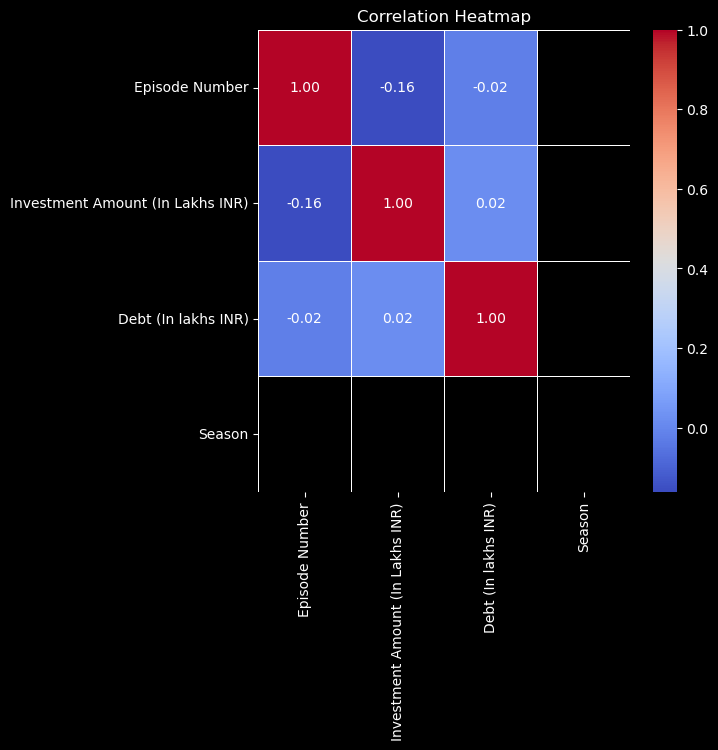

In [25]:
columns = df.columns
heatmap_data = df[columns]
plt.figure(figsize=(6, 6))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Distribution of Investment Amounts

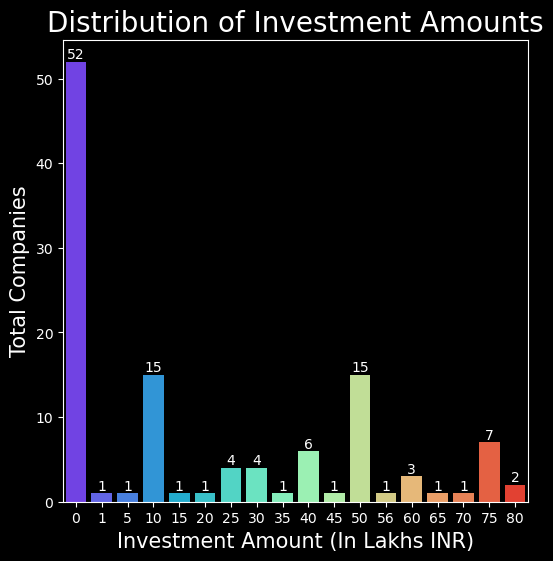

In [26]:
plt.figure(figsize = (6,6))
ax = sns.countplot(x='Investment Amount (In Lakhs INR)', data=df,palette = 'rainbow' )
plt.xlabel('Investment Amount (In Lakhs INR)', fontsize=15)
plt.ylabel('Total Companies', fontsize=15)
plt.title('Distribution of Investment Amounts', fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

#### Distribution of Debt Amounts

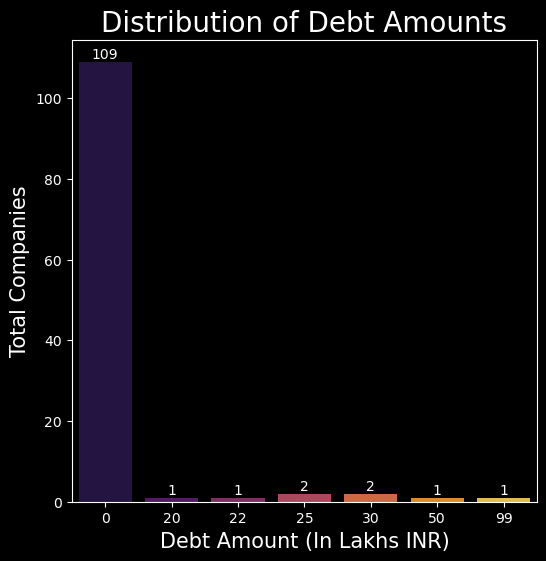

In [27]:
plt.figure(figsize = (6,6))
ax = sns.countplot(x='Debt (In lakhs INR)', data=df, palette = 'inferno')
plt.xlabel('Debt Amount (In Lakhs INR)', fontsize=15)
plt.ylabel('Total Companies', fontsize=15)
plt.title('Distribution of Debt Amounts', fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

#### Distribution of Equity

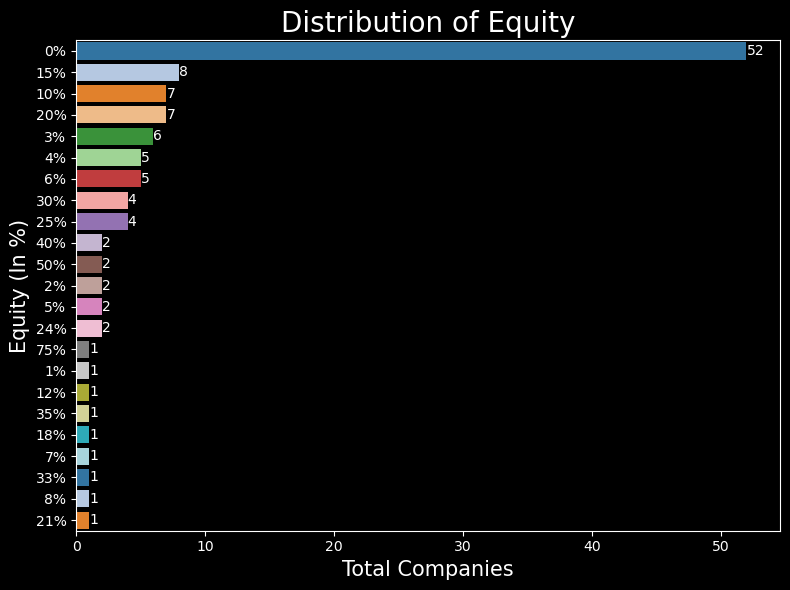

In [28]:
equity_counts = df['Equity'].value_counts().sort_values(ascending=False)
sorted_df = pd.DataFrame({'Equity': equity_counts.index, 'Count': equity_counts})
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Count', y='Equity', data=sorted_df, palette='tab20')
plt.xlabel('Total Companies', fontsize=15)
plt.ylabel('Equity (In %)', fontsize=15)
plt.title('Distribution of Equity', fontsize=20)
for bars in ax.containers:
    ax.bar_label(bars)

plt.tight_layout()
plt.show()

#### Investment by Anupam Mittal

In [29]:
import random
colors=['#8B0000', '#006400', '#8B8B00', '#00008B', '#8B008B', '#32CD32', '#8B008B', '#FF8C00', 
        '#A9A9A9', '#008B8B', '#8B008B', '#8B4513', '#556B2F', '#008080']
def plot_investment_distribution(shark):
    random_colors = random.sample(colors, len(colors))
    plt.pie(df[shark].value_counts(), [0.1, 0], labels=['N', 'Y'], autopct="%1.2f%%", colors=random_colors, shadow=True)
    plt.title(f"{shark}'s Investment Distribution in Companies (%)")
    plt.show()

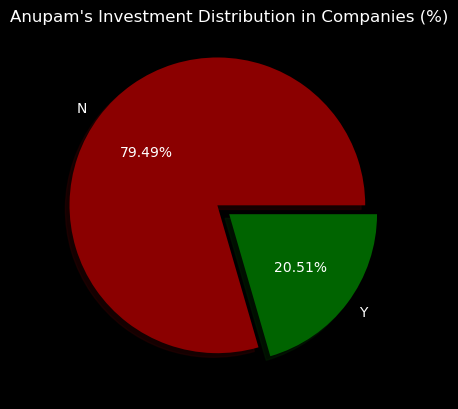

In [30]:
shark = 'Anupam'
plot_investment_distribution(shark)

#### Investment by Ashneer Grover

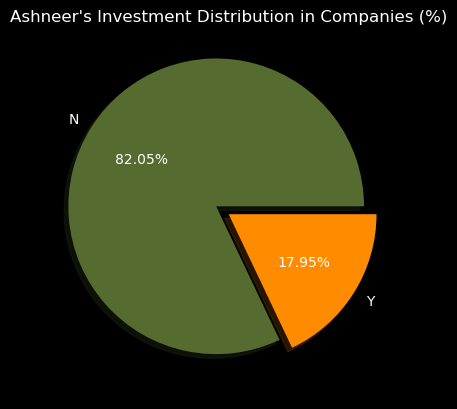

In [31]:
shark = 'Ashneer'
plot_investment_distribution(shark)

#### Investment by Namita Thapar

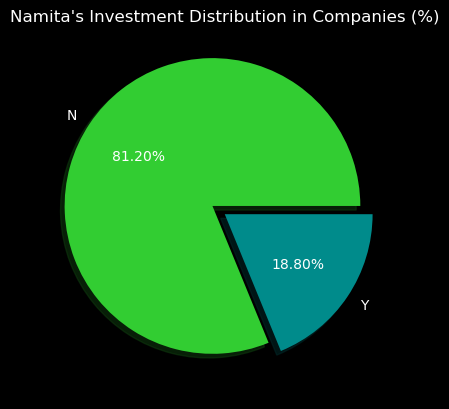

In [32]:
shark = 'Namita'
plot_investment_distribution(shark)

#### Investment by Aman Gupta

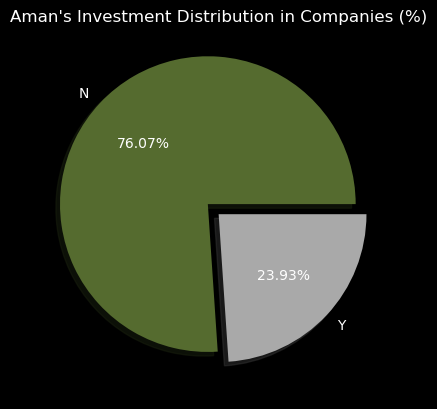

In [33]:
shark = 'Aman'
plot_investment_distribution(shark)

#### Investment by Peyush Bansal

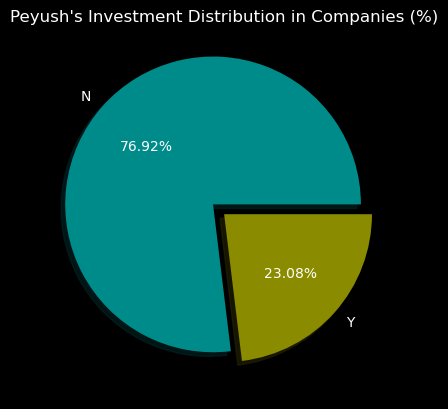

In [34]:
shark = 'Peyush'
plot_investment_distribution(shark)

#### Investment by Vineeta Singh

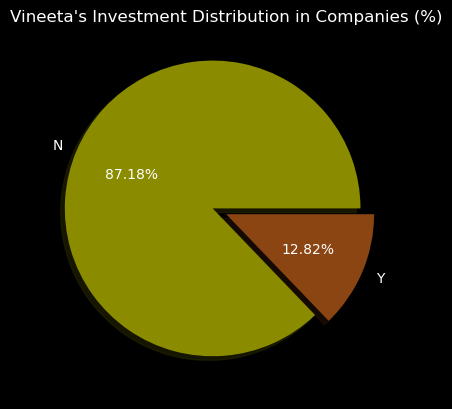

In [35]:
shark = 'Vineeta'
plot_investment_distribution(shark)

#### Investment by Ghazal Alagh

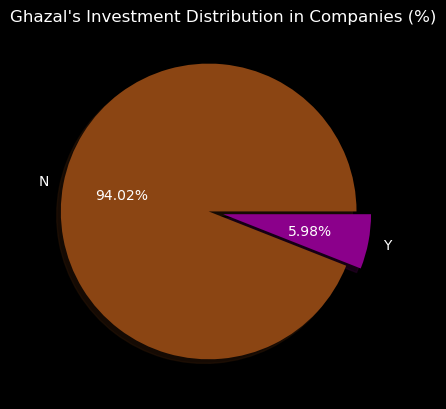

In [36]:
shark = 'Ghazal'
plot_investment_distribution(shark)

#### Investment Distribution by Sharks

In [37]:
def plot_investment_distribution(sharks):
    shark_data = []
    for shark in sharks:
        shark_counts = df[shark].value_counts()
        shark_data.append((shark, shark_counts.get('Y', 0), shark_counts.get('N', 0)))

    shark_df = pd.DataFrame(shark_data, columns=['Shark', 'Yes', 'No'])

    plt.figure(figsize=(10, 6))
    ax = shark_df.plot(x='Shark', kind='bar', stacked=True, color=['green', 'red'])
    
    plt.xlabel('Sharks')
    plt.ylabel('Number of Companies')
    plt.title('Investment Distribution by Sharks')
    legend = plt.legend(title='Investment (Y/N)', loc='upper left')
    legend.set_bbox_to_anchor((1, 1)) 
    
    for container in ax.containers:
        for label in container.patches:
            height = label.get_height()
            if height > 0: 
                ax.annotate(f'{int(height)}', (label.get_x() + label.get_width() / 2., height),
                            ha='center', va='bottom', fontsize=10, color='white')

    plt.tight_layout()
    plt.show()

<Figure size 1000x600 with 0 Axes>

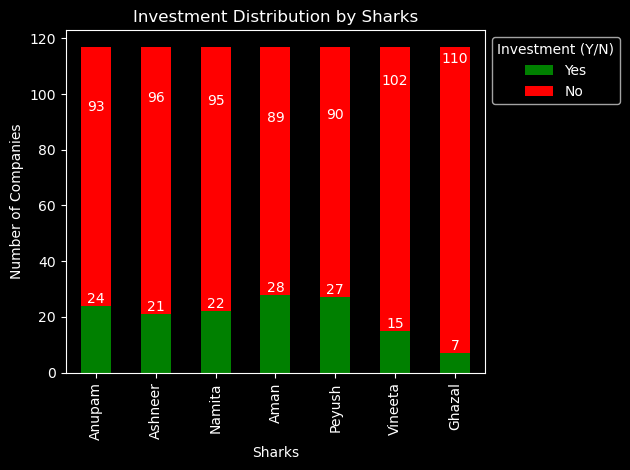

In [38]:
sharks = ['Anupam', 'Ashneer', 'Namita', 'Aman', 'Peyush', 'Vineeta', 'Ghazal']
plot_investment_distribution(sharks)

Aman and Peyush had invested in the most companies, while Ghazal had invested in fewer companies

#### Total Investment Amount by Episode Number

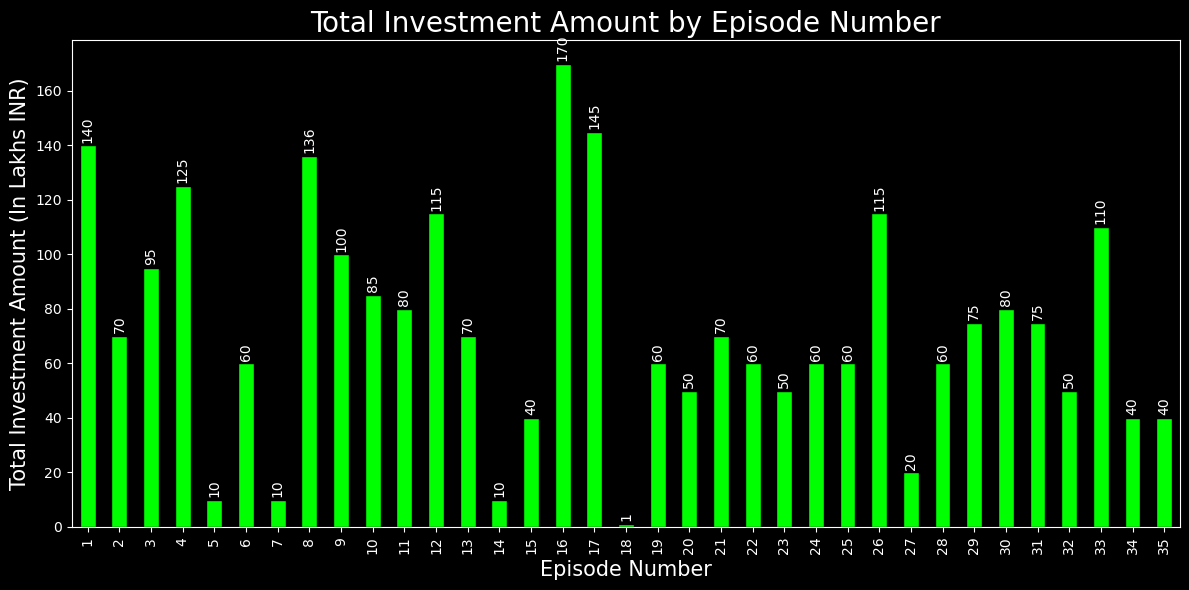

In [39]:
episode_investment = df.groupby('Episode Number')['Investment Amount (In Lakhs INR)'].sum()
plt.figure(figsize=(12, 6))
ax=episode_investment.plot(kind='bar', color='lime', edgecolor='black')
plt.xlabel('Episode Number', fontsize=15)
plt.ylabel('Total Investment Amount (In Lakhs INR)', fontsize=15)
plt.title('Total Investment Amount by Episode Number', fontsize=20)
plt.tight_layout()
for bars in ax.containers:
    ax.bar_label(bars, rotation=90, padding=2)

The largest investment was made in Episode 16

#### Investment Distribution by Gender

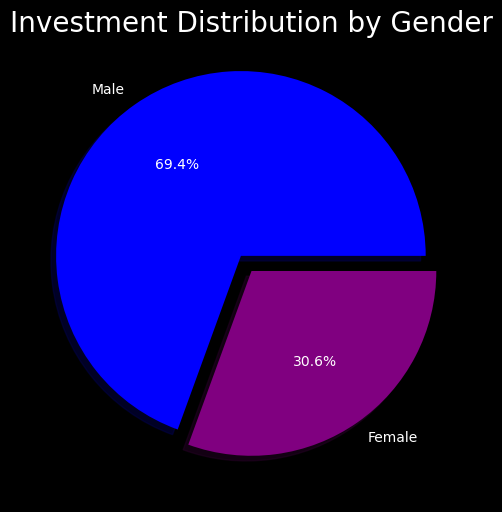

In [40]:
male_investments = df[['Anupam', 'Ashneer', 'Aman', 'Peyush']].apply(lambda row: row.str.count('Y').sum(), axis=1).sum()
female_investments = df[['Namita', 'Vineeta', 'Ghazal']].apply(lambda row: row.str.count('Y').sum(), axis=1).sum()

gender_labels = ['Male', 'Female']
investment_counts = [male_investments, female_investments]

plt.figure(figsize=(6,6))
plt.pie(investment_counts,[0.1, 0], labels=gender_labels, autopct="%1.1f%%", colors=['blue', 'purple'], shadow=True)
plt.title('Investment Distribution by Gender', fontsize=20)
plt.show()

Male sharks are investing more in companies compared to females, although it's important to note that there are a total of 4 male and 3 female sharks

### Insights
* Sharks were not interested to invest in 44% of brands
* Almost 93% companies didn't receive any Debt from Shark Tank
* Sharks were not interested in taking equity in 44% of the brands
* Aman and Peyush had invested in the most companies, while Ghazal had invested in fewer companies
* Anupam and Ashneer had invested in 20.51% and 17.95% companies respectively.
* Namita and Aman had invested in 18.80% and 23.93% companies respectively.
* Peyush, Vineeta and Ghazal had invested in 23.08%, 12.82% and 05.98% companies respectively.
* The largest investment was made in Episode 16
* Male sharks are investing more in companies compared to females, although it's important to note that there are a total of 4 male and 3 female sharks